In [1]:
from dotenv import load_dotenv
import os


load_dotenv()


BASE_DATA_PATH = os.getenv("BASE_DATA_PATH")




In [2]:
paths = {
    "base": BASE_DATA_PATH,
    "skewed_image": os.path.join(BASE_DATA_PATH, "data/doc_skew.png"),
    "output": os.path.join(BASE_DATA_PATH, "output/extracted_data.csv"),
    "skew_corrected_image": os.path.join(BASE_DATA_PATH, "datta/skew_corrected.jpg")
}




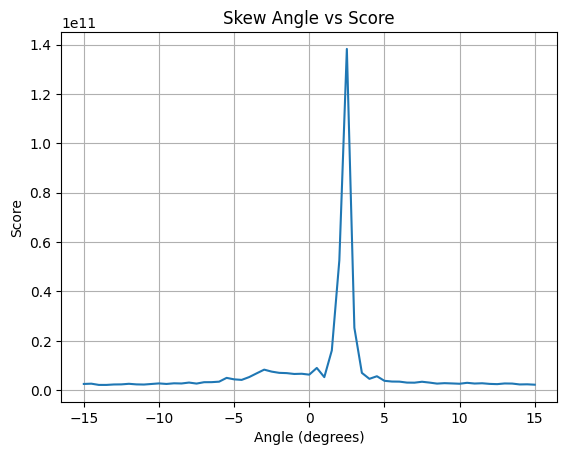

[INFO] Best skew angle: 2.50


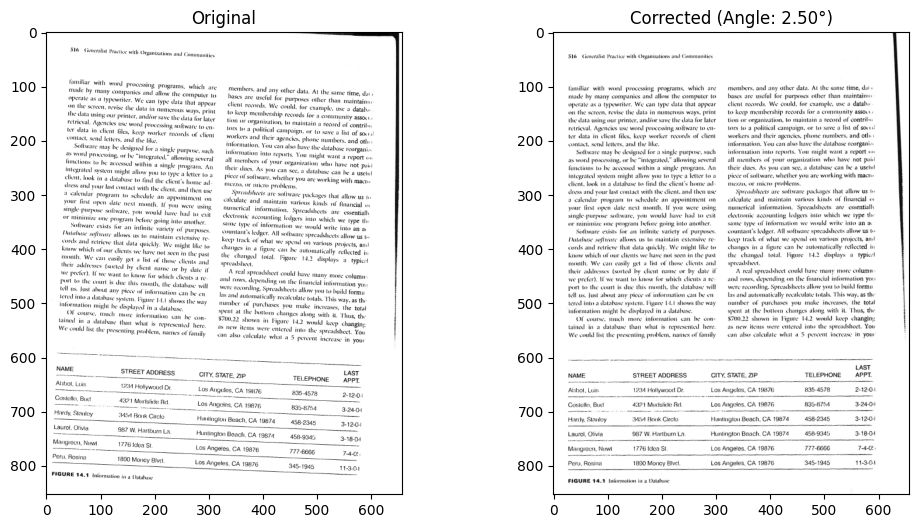

In [3]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
import os
from skew_correction import correct_skew
import matplotlib.pyplot as plt
from PIL import Image
import cv2

project_root = os.getcwd()
image_path = paths["skewed_image"]
save_path = paths["skew_corrected_image"]



img = cv2.imread(image_path)
angle, corrected_img = correct_skew(img, debug=True)
cv2.imwrite(save_path, corrected_img)

# Show before and after
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title(f"Corrected (Angle: {angle:.2f}°)")
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.show()


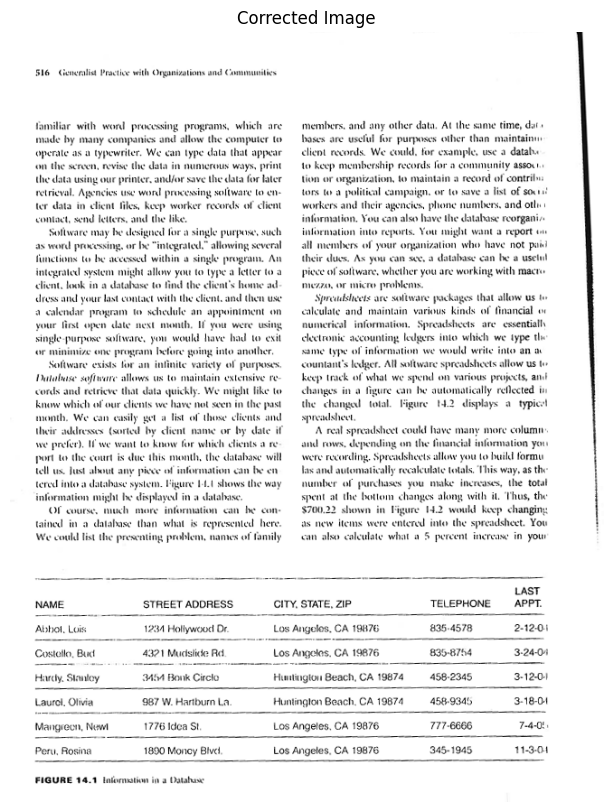

In [4]:
image_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(8, 10))
plt.imshow(image_rgb)
plt.title("Corrected Image")
plt.axis("off")
plt.show()

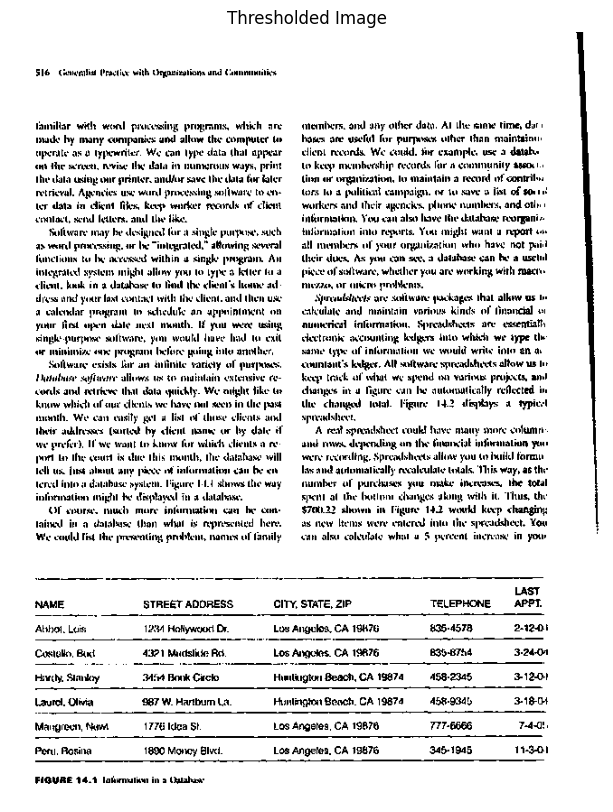

In [5]:
gray = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Display thresholded image
plt.figure(figsize=(8, 10))
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()


In [6]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
from ocr_extractor import OCRToJSONExtractor
from PIL import Image


image = gray  
extractor = OCRToJSONExtractor()
structured_json = extractor.process_image_to_json(image)
print(structured_json)


Tesseract Path: C:/Program Files/Tesseract-OCR/tesseract.exe
Raw OCR Text:===========================>
516 Generalist Practice with Ongniations and Communities
familiar with word processing programs, which are members, and any other data, AC the same time, dat»
made by many companies and allow the computer to bases are useful for purposes other than maintain
‘operate as a typewriter. We ean type data that appear client records. We could, for example, use a databs
‘onthe seroen, revise tie data in numerous ways, print 9 keep membership revords for a community assoxt
the data using our printer. and/or save the data for later tion or organization, to maintain a record of contrl
retrieval, Agencies use word processing soliware to en- tors to politcal eampaign. or to save a list of sors!
ter data in elicnt files, keep worker records of client workers and their agencies, phone numbers, and oth:
wontact, send letters, and the like information, You can also have the database reorganis
Soliware

In [7]:
response = structured_json

In [8]:
import re
import json
import pandas as pd


match = re.search(r'\[\s*{.*?}\s*\]', response, re.DOTALL)
if match:
    json_str = match.group(0)
    data = json.loads(json_str)
    df = pd.DataFrame(data)
    # print(df)
else:
    print("No JSON array found in response.")


In [9]:
df

,Name,Street Address,City,State,ZIP,Telephone,Appointment Date
0,"Abbot, Lois",1234 Hollywood Or,Los Angeles,CA,19876,835-4578,21208
1,"Costello, Bact",4321 Mudslide Ba,Los Angeles,CA,19876,835-8754,3.240%
2,Haaly Stanloy,34° Bonk Circle,Huntington Beach,CA,19874,458-2345,3120)
3,"Laurel, Otvia",987 W. Hartburn La.,Huntington Beach,CA,19874,458-9345,31801
4,"Mangieon, Newt",1776 Idea St,Los Angeles,CA,19876,777-6666,74-08
5,"Peru, Rosina",1890 Money Bivc,Los Angeles,CA,19876,345-1945,11901


In [10]:
df.to_csv(paths["output"])